# Barlow's equation in conjungtion with the KAPA methods.

The Barlow's equation is used for the compute the internal yield pressure in a tubular-thinned wall cylinder. 

In [146]:
#Importing some modules that will be used later
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

## Barlow as a thick wall hoop stress

Barlow's equation:
$$ p_b = 2\frac{\sigma_y t}{D_0}$$
The previuos expression is widely used to compute the burst pressure. This formula estimate the internal pressure that the pipe withstand given its geometry ($t/D$) and material strength ($\sigma_y$).

In [147]:
def barlow_pressure(sigma ,thickness ,diameter):
    return 2.* sigma * thickness / diameter

### Case of study

For the sake of have a better understanding, lets consider the following crack profile on a 30" diameter pipe with a wall thickness of 0.375". Also, for the pipe let us consider a SMYS of 60100 psi and a design factor of 0.72 for a maximum operating pressure (MOP) of 1503 psi. For this case, we'are going to assume a upper Charpy V-notch (CVN) of 25 ft-lb. 

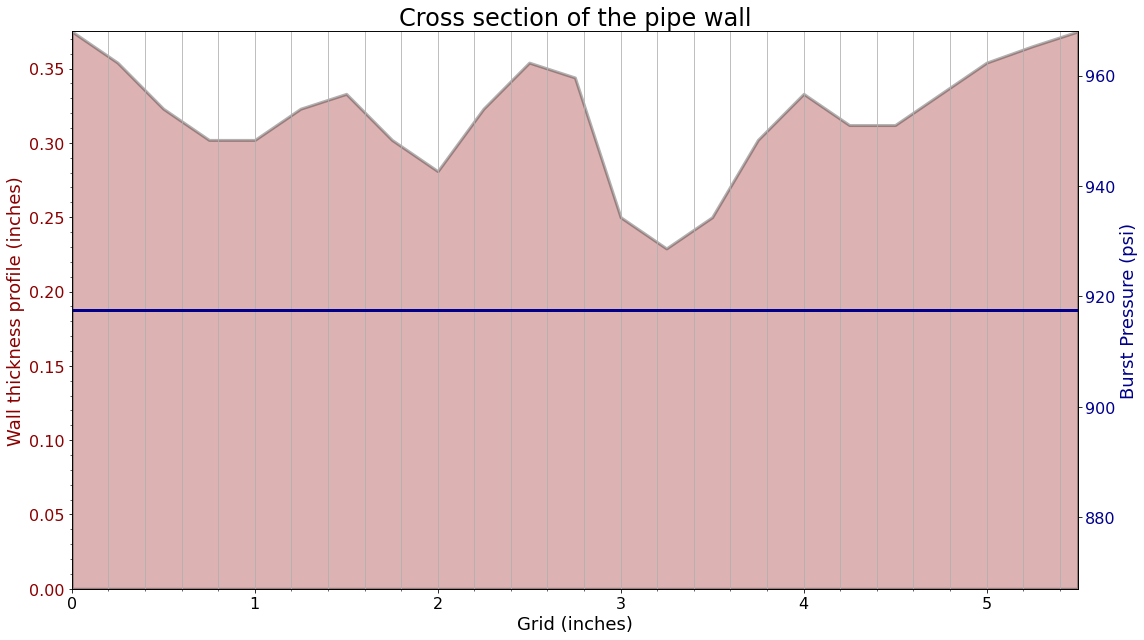

In [148]:
# thickness and diameter are expressed on inches. sigma is expressed in psi.
thickness = 0.375
diameter = 30
sigma = 60100

# Importing some crack profile
cprof = pd.read_excel('test_case.xlsx')

# Computing the SMYS pressure for the following profile
smys_pressure = np.zeros(len(cprof))
for i, i_row in cprof.iterrows():
    smys_pressure[i] = barlow_pressure(sigma, thickness - cprof['depth'][i], diameter)

cprof['smys_pressre'] = smys_pressure

x_axis = cprof['profile_spacing'].to_numpy()

# Plotting the crack profile
color1 = 'darkred'
color2 = 'darkblue'

fig, axs = plt.subplots(figsize=(16,9))

axs.fill_between(cprof['profile_spacing'], thickness - cprof['depth'], 0, linewidth=3, color=color1, alpha=0.3, ec='black')

axs.set_xlabel('Grid (inches)', size=18)
axs.tick_params(axis='x', labelsize=16)

axs.set_ylabel('Wall thickness profile (inches)', size=18, color=color1)
axs.tick_params(axis='y', labelcolor=color1, labelsize=16)

axs.set_xlim(min(cprof['profile_spacing']), max(cprof['profile_spacing']))
axs.set_ylim(0, thickness)

axs.minorticks_on()
axs.grid(axis='x', which='both')

axs1 = axs.twinx()
axs1.hlines(cprof['smys_pressre'].min(), x_axis[0], x_axis[-1], linewidth=3, color=color2)

axs1.set_ylabel('Burst Pressure (psi)', size=18, color=color2)
axs1.tick_params(axis='y', labelcolor=color2, labelsize=16)

plt.title('Cross section of the pipe wall', size=24)
fig.tight_layout()

## KAPA for a crack-like defect.

The failure stress (in psi) computed through the KAPA method, is given by the following equation:

$$ 3\dfrac{\pi \epsilon (C_v/A_v)}{{\bar\sigma}^2L} = \ln\left[\sec\left( \dfrac{\pi}{2}\dfrac{M_p\sigma_p}{\bar\sigma}\right) \right] $$

Where $C_v$ is the upper shelf Charpy V-notch impact energy (ft-lb) and $A_v$ is the area expressed in square inches. $\epsilon$ is the elastic modulus (psi). $\bar \sigma$ flow stress (SMYS + 10 000 psi) (psi) and $\sigma_p$ is the failure stress (psi). With $M_p$ is given by

$$ M_p = \dfrac{1-\frac{A}{A_0}M_T^{-1}}{1-\frac{A}{A_0}} $$ 

$M_T$ si given by:

$$ M_T = \begin{cases} 
\sqrt{1 + 0.62756 \frac{L^2}{Dt} - 0.003375 \left(\frac{L^2}{Dt}\right)^2} & \text{if} &L \leq \sqrt{50 Dt} \\ 
0.032 \frac{L^2}{Dt} + 3.3 & \text{if} &L>\sqrt{50 Dt} 
\end{cases} $$

In order to compute the burst stress, the first step is to compute the whole area of the missing region (shadowed on blue). For that purpose we use the following formula for each segment $$ A = \sum_{i} \dfrac{\Delta x_i \times (y_{i+1} + y_i)}{2} $$

In [149]:
# Lost area...
def lost_area(x, y):
    '''Compute the area of the lost profile using a trapezoid formula 
    Input: x, y which are the data points
    Output the overall area
    '''
    area = 0.0

    if len(x) == len(y):
        n_size = len(x)
        for i in range(n_size-1):
            h = x[i+1] - x[i]
            area += 0.5 * h * (y[i+1]+y[i])
        return area
    else:
        print('x and y are not of the same saize. Size(x): {}, size(y){}'.format(len(x), len(y)))
        pass

# Stress... Sigma sub P
def kapa_sigma(length, diameter, thickness, sigma_smys ):
    pass

ValueError: No axis named 0.14599999999999996 for object type DataFrame

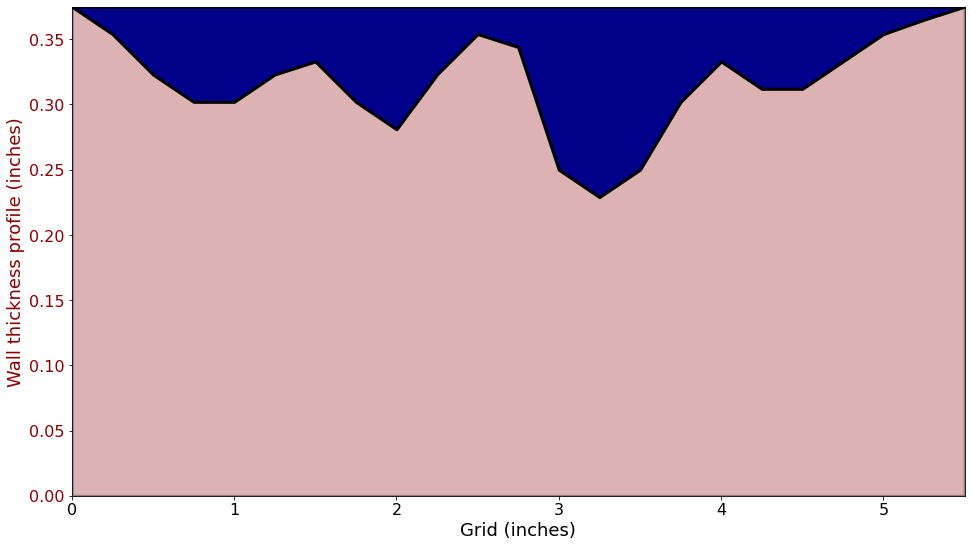

In [150]:
# Compute the lost area on the wall
x = cprof['profile_spacing'].to_numpy()
y = cprof['depth'].to_numpy()

area = lost_area(x, y)

color1 = 'darkred'
color2 = 'darkblue'

fig, axs = plt.subplots(figsize=(16,9))

axs.fill_between(cprof['profile_spacing'], thickness - cprof['depth'], 0, linewidth=3, color=color1, alpha=0.3, ec='black')
axs.fill_between(cprof['profile_spacing'], thickness - cprof['depth'], thickness, linewidth=3, color=color2, ec='black')

axs.set_xlabel('Grid (inches)', size=18)
axs.tick_params(axis='x', labelsize=16)

axs.set_ylabel('Wall thickness profile (inches)', size=18, color=color1)
axs.tick_params(axis='y', labelcolor=color1, labelsize=16)

axs.set_xlim(min(cprof['profile_spacing']), max(cprof['profile_spacing']))
axs.set_ylim(0, thickness)

g_comment = 'The missing area on the wall thickness profile is: {:f} square inches'.format(area)

print(g_comment)